<a href="https://colab.research.google.com/github/mauroemartinez/HSK_Vocabulary/blob/main/HSK_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 汉语 书平 考试 1 - 6 级 词汇表 数据分析

---


# HSK (Chinese Proficiency Exam) 1 - 6 Vocabulary List

By this project we would like to help students know the importance of each initial and character driven by the frequency of apparitions on the HSK vocabulary, which does not inform directly, but subtly.
Our database will be each .xlsx and .csv files downloaded from the website https://www.purpleculture.net/textbook-vocab-lists/
We will need to concatenate all the files. In order to do that, we need to see if columns are the same between the six files. If not, we will have to transform the data until every file is compatible with each other.
After concatenation, we will need to **split every word/phrase into single characters. Thus, allowing us to count the frequency of each character.**
A bar chart will be the cherry-on-top for the project, allowing the visualization of the data ordered from top most frequent to least frequent character.


# Google Drive mounting and databases importation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data reading and merging

In [124]:
import pandas as pd

# CSV file paths
file_paths = [
    '/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 1 (150 words).csv',
    '/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 2 (151 words).csv',
    '/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 3 (300 words).csv',
    '/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 4 (600 words).csv',
    '/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 5 (1300 words).csv',
    '/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 6 (2500 words).csv'
]

# HSK levels list
hsk_levels = [1, 2, 3, 4, 5, 6]

# Empty list to save the HSK vocabulary dataframes
hsk_list = []

# Iter through file paths and levels
for file_path, hsk_level in zip(file_paths, hsk_levels):
    hsk_df = pd.read_csv(file_path) # Read each CSV file
    hsk_df['HSK'] = hsk_level # Add HSK level column per file
    hsk_list.append(hsk_df) # Save each DataFrame on the empty list

# Concat all Dataframes in one
df = pd.concat(hsk_list, ignore_index=True)

# Ahora tienes un único DataFrame que contiene los datos de todos los niveles HSK
df

,ID,Chinese,Trad.,Pinyin,English Definition,HSK,Unnamed: 0,Unnamed: 6
0,1,爱,愛,ài,love,1,NaN,NaN
1,2,八,八,bā,eight,1,NaN,NaN
2,3,爸爸,爸爸,bà ba,Dad,1,NaN,NaN
3,4,杯子,杯子,bēi zi,cup; glass,1,NaN,NaN
4,5,北京,北京,běi jīng,Beijing,1,NaN,NaN
...,...,...,...,...,...,...,...,...
4996,2496,作废,作廢,zuò fèi,cancellation; delete; to nullify; to expire an...,6,NaN,NaN
4997,2497,作风,作風,zuò fēng,work style; way,6,NaN,NaN
4998,2498,作息,作息,zuò xī,work and rest,6,NaN,NaN
4999,2499,座右铭,座右銘,zuò yòu míng,motto,6,NaN,NaN


# Preprocessing

In [125]:
# Drop first and NaN columns
df = df.dropna(axis=1, how="all").iloc[:,1:]
df

,Chinese,Trad.,Pinyin,English Definition,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸爸,爸爸,bà ba,Dad,1
3,杯子,杯子,bēi zi,cup; glass,1
4,北京,北京,běi jīng,Beijing,1
...,...,...,...,...,...
4996,作废,作廢,zuò fèi,cancellation; delete; to nullify; to expire an...,6
4997,作风,作風,zuò fēng,work style; way,6
4998,作息,作息,zuò xī,work and rest,6
4999,座右铭,座右銘,zuò yòu míng,motto,6


In [126]:
# Rename columns with more suitable labels
columns_mapping = {
    'Chinese': 'Simplified',
    'Trad.': 'Traditional',
    'English Definition': 'English Translation'
}
df = df.rename(columns=columns_mapping)
df

,Simplified,Traditional,Pinyin,English Translation,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸爸,爸爸,bà ba,Dad,1
3,杯子,杯子,bēi zi,cup; glass,1
4,北京,北京,běi jīng,Beijing,1
...,...,...,...,...,...
4996,作废,作廢,zuò fèi,cancellation; delete; to nullify; to expire an...,6
4997,作风,作風,zuò fēng,work style; way,6
4998,作息,作息,zuò xī,work and rest,6
4999,座右铭,座右銘,zuò yòu míng,motto,6


# New dataframe for frequency calculation

In [139]:
# We need to split the Simplified column into rows by hanzi, so that we can count each character's frequency
# Let's do it in a new df which will be a copy of the original one
df_hsk_freq = df.copy()

# String split into a list per row with the split characters
import re
df_hsk_freq['Simplified'] = df_hsk_freq['Simplified'].apply(
    lambda x : re.findall('.{1,1}', x))

# Explode the dataset, split each element in a different row
df_hsk_freq = df_hsk_freq.explode('Simplified')
df_hsk_freq

,Simplified,Traditional,Pinyin,English Translation,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸,爸爸,bà ba,Dad,1
2,爸,爸爸,bà ba,Dad,1
3,杯,杯子,bēi zi,cup; glass,1
...,...,...,...,...,...
4999,座,座右銘,zuò yòu míng,motto,6
4999,右,座右銘,zuò yòu míng,motto,6
4999,铭,座右銘,zuò yòu míng,motto,6
5000,做,做主,zuò zhǔ,decide; take the responsibility for a decision,6


In [140]:
# Only Simplified and HSK columns are neccessary for our analysis
df_hsk_freq = df_hsk_freq[["Simplified", "HSK"]]
df_hsk_freq

,Simplified,HSK
0,爱,1
1,八,1
2,爸,1
2,爸,1
3,杯,1
...,...,...
4999,座,6
4999,右,6
4999,铭,6
5000,做,6


# Hanzi frequency analysis

In [141]:
# Font installation or it won't print Chinese characters in charts
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# Import plotting libraries and font manager
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

--2023-09-20 03:18:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.218.102, 173.194.218.113, 173.194.218.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rpi61o227udt20r941gisv4r7h2pebk6/1695179850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b027723f-4d73-49d6-a9d9-580e3864927e [following]
--2023-09-20 03:18:17--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rpi61o227udt20r941gisv4r7h2pebk6/1695179850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b027723f-4d73-49d6-a9d9-580e3864927e
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to d

In [142]:
# From the characters list, we count their frequency in a new DataFrame
df_hsk_freq_count = df_hsk_freq.Simplified.value_counts()
df_hsk_freq_count = pd.DataFrame(df_hsk_freq_count)
df_hsk_freq_count

,Simplified
不,64
子,58
心,41
气,39
发,38
...,...
喘,1
舶,1
川,1
熊,1


In [143]:
# As it saved the count as Simplified, while it should be the index, we rename index and column
df_hsk_freq_count.index.name = 'Simplified'
df_hsk_freq_count.columns = ['Frequency']
df_hsk_freq_count

,Frequency
Simplified,
不,64
子,58
心,41
气,39
发,38
...,...
喘,1
舶,1
川,1


In [146]:
# Reduce the DataFrame to top X
top_x = 25
df_hsk_freq_count_top_x = df_hsk_freq_count.copy()
df_hsk_freq_count_top_x = df_hsk_freq_count_top_x.head(top_x)
df_hsk_freq_count_top_x

,Frequency
Simplified,
不,64
子,58
心,41
气,39
发,38
人,34
理,34
动,33
实,33


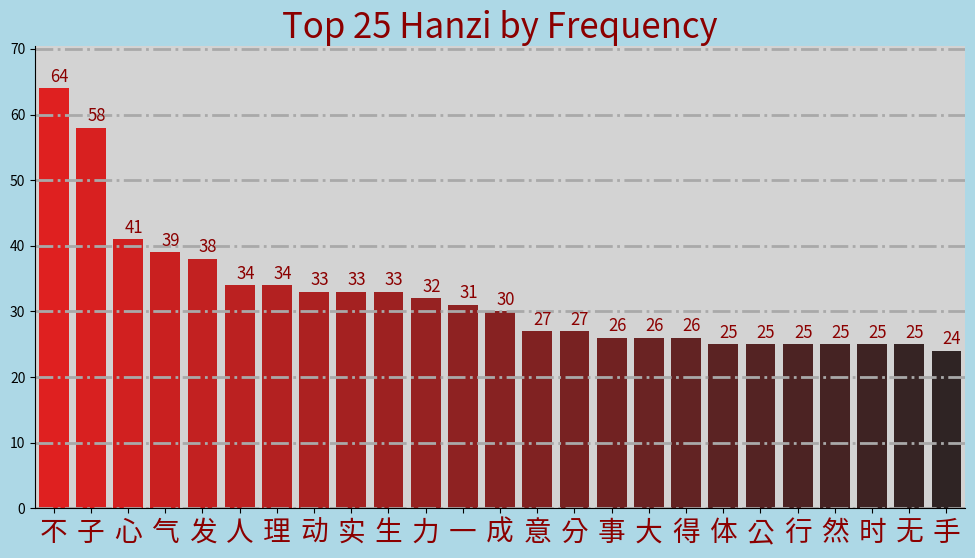

In [149]:
# Apply font
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rcParams['font.family'] = 'Taipei Sans TC Beta'

# Total of different character (no need of unique, it was already split by value_counts)
total_hanzi = len(df_hsk_freq_count)

# Barplot filtered by top 15
plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(
    x = df_hsk_freq_count_top_x.index,
    y = df_hsk_freq_count_top_x.Frequency,
    palette=sns.color_palette("dark:red_r", top_x)
)

# Customize backgrounds
bar_chart.set_facecolor('lightgrey')
bar_chart.grid(which='major', axis="y", linewidth=2, linestyle="-.", color="darkgrey")
plt.gcf().patch.set_facecolor('lightblue')

title = f'Top {top_x} Hanzi by Frequency'

# Customize title
bar_chart.set_title(
    title,
    fontsize=25,
    fontweight='bold',
    color = "darkred"
)

# Drop the Y label and ticks
bar_chart.set(ylabel=None)

# Drop the X label
bar_chart.set(xlabel=None)

# Set Y limit to be a bit higher than maximum frequency
max_freq = max(df_hsk_freq_count_top_x.Frequency)
bar_chart.set_ylim(0, max_freq * 1.1)

# Customize the X ticks
bar_chart.set_xticklabels(
    df_hsk_freq_count_top_x.index.tolist(),
    size = 20,
    color = "darkred"
)

# Annotate data labels a bit above each column
for p, label in zip(bar_chart.patches, df_hsk_freq_count_top_x.Frequency):
    bar_chart.annotate(
        label,
        (p.get_x()+0.3, p.get_height()+1),
        fontsize=12,
        color="darkred"
    )
plt.savefig(f"{title}.jpg")

sns.despine()
plt.show()

The top 2 characters mean "no" and "son" (though not used to address a son, it is an etymological meaning, it is often used in nouns, for example, table 桌子 and chair 椅子), they are both written with three strokes and are the only characters that appear more than fifty times.
The remaining characters, are also simple characters like heart, air, life, strength, person and one.

In [195]:
# These DataFrames can lead us to some conclusions
average = len(df_hsk_freq)/total_hanzi

# Unique quantities per exam
unique_hsk1 = df_hsk_freq[df_hsk_freq['HSK']==1]["Simplified"].nunique()
unique_hsk2 = df_hsk_freq[df_hsk_freq['HSK']==2]["Simplified"].nunique()
unique_hsk3 = df_hsk_freq[df_hsk_freq['HSK']==3]["Simplified"].nunique()
unique_hsk4 = df_hsk_freq[df_hsk_freq['HSK']==4]["Simplified"].nunique()
unique_hsk5 = df_hsk_freq[df_hsk_freq['HSK']==5]["Simplified"].nunique()
unique_hsk6 = df_hsk_freq[df_hsk_freq['HSK']==6]["Simplified"].nunique()
unique_hsk1_6 = df_hsk_freq["Simplified"].nunique()

# Rows per HSK exam, which means the quantity of words
rows_hsk1 = df[df['HSK']==1].shape[0]
rows_hsk2 = df[df['HSK']==2].shape[0]
rows_hsk3 = df[df['HSK']==3].shape[0]
rows_hsk4 = df[df['HSK']==4].shape[0]
rows_hsk5 = df[df['HSK']==5].shape[0]
rows_hsk6 = df[df['HSK']==6].shape[0]
rows_hsk1_6 = df.shape[0]

# Average per word by HSK exam
average_hsk1 = unique_hsk1/rows_hsk1
average_hsk2 = unique_hsk1/rows_hsk1
average_hsk3 = unique_hsk3/rows_hsk3
average_hsk4 = unique_hsk4/rows_hsk4
average_hsk5 = unique_hsk5/rows_hsk5
average_hsk6 = unique_hsk6/rows_hsk6
average_hsk1_6 = unique_hsk1_6/rows_hsk1_6


print(f"""Conclusions:

1- Actually, we study {unique_hsk1_6:,} distinct hanzi, in a total of {total_hanzi:,} words.
2- The average of characters per row is: {average:.2f}.
3- The average of characters per row does not change much from the whole HSK 1-6 vocabulary list to only HSK 6 list since it is {average_hsk6:.2f}.
4- The most frequent characters are beginner friendly.
5- The distinct hanzi qunatity per HSK against total words and average are:

HSK 1 = {unique_hsk1} distinct characters || {rows_hsk1} words || {average_hsk1:.2f} average characters per word
HSK 2 = {unique_hsk2} distinct characters || {rows_hsk2} words || {average_hsk2:.2f} average characters per word
HSK 3 = {unique_hsk3} distinct characters || {rows_hsk3} words || {average_hsk3:.2f} average characters per word
HSK 4 = {unique_hsk4} distinct characters || {rows_hsk4} words || {average_hsk4:.2f} average characters per word
HSK 5 = {unique_hsk5:,} distinct characters || {rows_hsk5:,} words || {average_hsk5:.2f} average characters per word
HSK 6 = {unique_hsk6:,} distinct characters || {rows_hsk6:,} words || {average_hsk6:.2f} average characters per word
HSK 1-6 = {unique_hsk1_6:,} distinct characters || {rows_hsk1_6:,} words || {average_hsk1_6:.2f} average characters per word
""")

Conclusions:

1- Actually, we study 2,663 distinct hanzi, in a total of 2,663 words.
2- The average of characters per row is: 3.63.
3- The average of characters per row does not change much from the whole HSK 1-6 vocabulary list to only HSK 6 list since it is 0.83.
4- The most frequent characters are beginner friendly.
5- The distinct hanzi qunatity per HSK against total words and average are:

HSK 1 = 174 distinct characters || 150 words || 1.16 average characters per word
HSK 2 = 208 distinct characters || 151 words || 1.16 average characters per word
HSK 3 = 399 distinct characters || 300 words || 1.33 average characters per word
HSK 4 = 716 distinct characters || 600 words || 1.19 average characters per word
HSK 5 = 1,207 distinct characters || 1,300 words || 0.93 average characters per word
HSK 6 = 2,077 distinct characters || 2,500 words || 0.83 average characters per word
HSK 1-6 = 2,663 distinct characters || 5,001 words || 0.53 average characters per word



<ipython-input-204-20a8e4cb4544>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


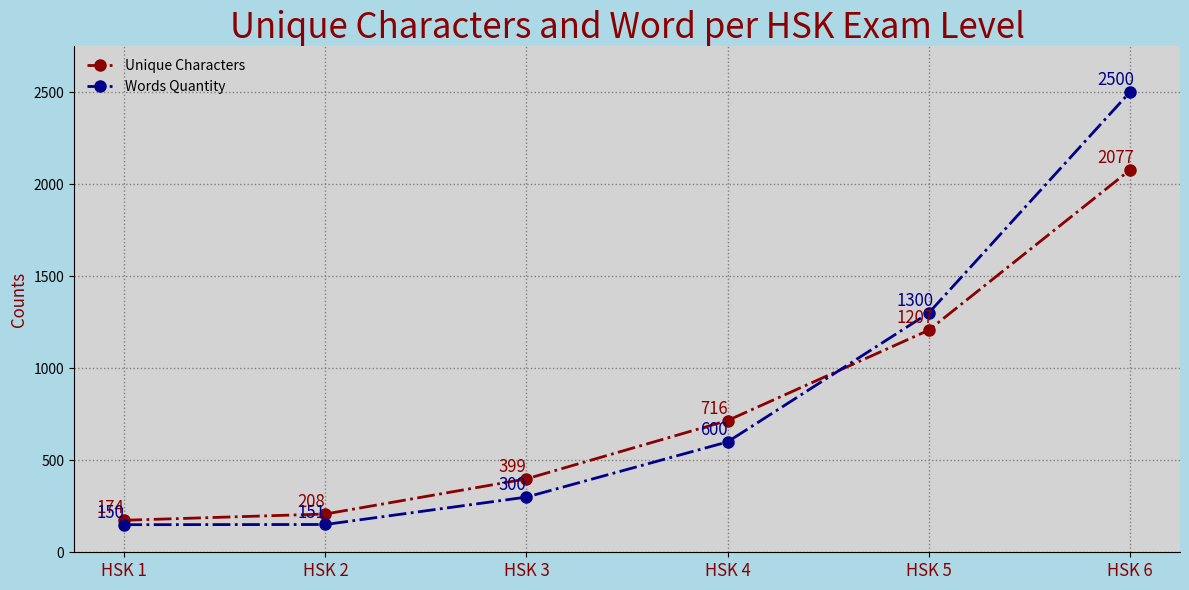

In [204]:
#Let's plot the last inisghts
hsk_levels = ['HSK 1', 'HSK 2', 'HSK 3', 'HSK 4', 'HSK 5', 'HSK 6']
unique_counts = [unique_hsk1, unique_hsk2, unique_hsk3, unique_hsk4, unique_hsk5, unique_hsk6]
words_counts = [rows_hsk1, rows_hsk2, rows_hsk3, rows_hsk4, rows_hsk5, rows_hsk6]

# Create a line plot for unique characters
fig,ax = plt.subplots(figsize=(12, 6))
plt.plot(
    hsk_levels,
    unique_counts,
    marker='o',
    markersize=8,
    color='darkred',
    linestyle='-.',
    linewidth=2,
    label='Unique Characters'
    )
# Create a line plot for words quantity
plt.plot(
    hsk_levels,
    words_counts,
    marker='o',
    markersize=8,
    color='darkblue',
    linestyle='-.',
    linewidth=2,
    label='Words Quantity'
)

# Customize backgrounds
fig.patch.set_facecolor('lightblue')  # Background color of the figure
ax.set_facecolor('lightgrey')  # Background color of the plot area
ax.grid(which='both', linewidth=1, linestyle=":", color="grey")

plt.xlabel('')
plt.ylabel(
    'Counts',
    fontsize=12,
    color="darkred"
    )
plt.ylim(0, max(words_counts) * 1.1)

title = "Unique Characters and Word per HSK Exam Level"
plt.title(
    title,
    fontsize=25,
    fontweight="bold",
    color="darkred"
    )
ax.set_xticklabels(
    hsk_levels,
    size=12,
    color="darkred"
)

# Annotate data labels a bit above each marker
for x, y in zip(hsk_levels, unique_counts):
    plt.annotate(
        f'{y}',  # Label text
        (x, y),  # Data point coordinates
        textcoords="offset points",  # Offset the label position
        xytext=(-10, 5),  # How much to offset (in points)
        ha='center',  # Horizontal alignment
        fontsize=12,
        color="darkred"
    )
for x, y in zip(hsk_levels, words_counts):
    plt.annotate(
        f'{y}',  # Label text
        (x, y),  # Data point coordinates
        textcoords="offset points",  # Offset the label position
        xytext=(-10, 5),  # How much to offset (in points)
        ha='center',  # Horizontal alignment
        fontsize=12,
        color="darkblue"
    )

# Display the plot
sns.despine()
plt.legend(frameon = False)
plt.tight_layout()
plt.savefig(f"{title}.jpg")
plt.show()

<ipython-input-202-adb0e494fd8b>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


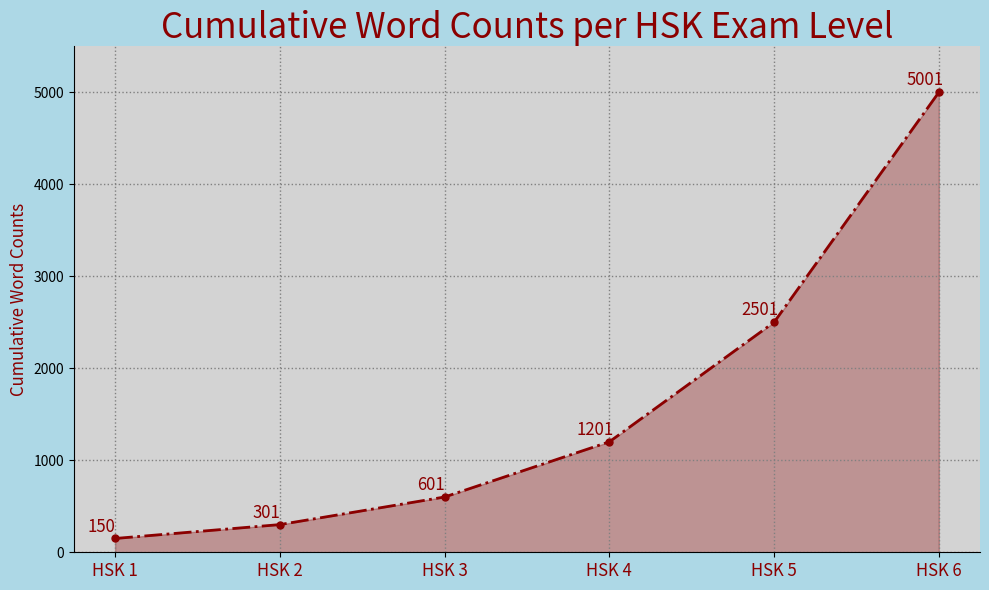

In [202]:
# Let's plot the cumulative quantities
import numpy as np
cumulative_words_counts = np.cumsum(words_counts)

# Create a line plot for cumulative word counts (in darkblue)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(
    hsk_levels,
    cumulative_words_counts,
    marker='o',
    markersize=5,
    color='darkred',
    linestyle='-.',
    linewidth=2
    )

# Customize backgrounds
fig.patch.set_facecolor('lightblue')  # Background color of the figure
ax.set_facecolor('lightgrey')  # Background color of the plot area
ax.grid(which='both', linewidth=1, linestyle=":", color="grey")

plt.xlabel('')
plt.ylabel(
    'Cumulative Word Counts',
    fontsize=12,
    color="darkred"
)
plt.ylim(0, max(cumulative_words_counts) * 1.1)

ax.set_xticklabels(
    hsk_levels,
    size = 12,
    color = "darkred"
)

title = 'Cumulative Word Counts per HSK Exam Level'
plt.title(
    title,
    fontsize=25,
    fontweight="bold",
    color="darkred"
)

# Annotate data labels a bit below each marker for cumulative word counts
for x, y in zip(hsk_levels, cumulative_words_counts):
    plt.annotate(
        f'{y}',  # Label text
        (x, y),  # Data point coordinates
        textcoords="offset points",  # Offset the label position
        xytext=(-10, 5),  # How much to offset (in points)
        ha='center',  # Horizontal alignment
        fontsize=12,
        color="darkred"
    )

plt.fill_between(
    hsk_levels,
    0,
    cumulative_words_counts,
    alpha=0.3,  # Adjust transparency of the fill
    color='darkred'
)

# Display the plot without legend background
sns.despine()
plt.tight_layout()
plt.savefig(f"{title}.jpg")
plt.show()